In [67]:
from scipy.sparse import random
import numpy as np
from qpsolvers import solve_qp
import matplotlib.pyplot as plt
import cvxpy as cp
from IPython.display import Markdown, display

## Problem 4.(4)
# Define parameters
n = 100  # nodes
m = 10  # edges

np.random.seed(5615234)
A = random(n, m, density=0.02).A  # sparse matrix A
for i in range(n):
    for j in range(m):
        if A[i, j] > 0.5:  # to call a ndarray type A, use A[0,0]
            A[i, j] = 1
        elif A[i, j] > 0:
            A[i, j] = -1

np.random.seed(2922963)
x = random(m, 1, density=0.3).A
np.random.seed(2648157)
y = random(m, 1, density=0.5).A

s = A.dot(x)
t = A.dot(y)

# sSumNonZero = (s!=0).sum()  # check nonzero elements
# tSumNonZero = (t!=0).sum()  # check nonzero elements

# Define primal variables
x = np.zeros((m, 1))
y = np.zeros((m, 1))

# Define dual variables
lambda1 = np.zeros((n, 1))
lambda2 = np.zeros((n, 1))
mu1 = np.zeros((m, 1))
mu2 = np.zeros((m, 1))

# Dual decomposition
iterMax = 150
p = []  # primal optimal
q = []  # dual optimal


# Define argmin_x,y F(x) for step 1 of distributed algorithm
def argminxy(delta1, delta2):
    P = np.array([[2.2, 2.], [2., 2.2]])
    q = np.array([[delta1, delta2]]).reshape((2,))
    G = np.array([[-1., 0.], [0., -1.]])
    h = np.array([0., 0.]).reshape((2,))

    # Solve QP
    x = solve_qp(P, q, G, h)
    # p = 1 / 2 * np.dot(np.dot(x, P), x) + np.dot(q, x)
    return x[0], x[1]


# Dual decomposition
for i in range(iterMax):
    # Step 1: calculate x_min and y_min
    delta1 = A.transpose().dot(lambda1)
    delta2 = A.transpose().dot(lambda2)
    for j in range(m):
        x[j, 0], y[j, 0] = argminxy(delta1[j, 0], delta2[j, 0])

    # Step 2: calculate p and q
    lag = sum((x + y) ** 2) + 0.1 * sum(x ** 2 + y ** 2) \
        + lambda1.transpose().dot(-s + A.dot(x)) + lambda2.transpose().dot(-t + A.dot(y))
    q = np.append(q, lag)
    f = sum((x + y) ** 2) + 0.1 * sum(x ** 2 + y ** 2)
    p = np.append(p, f)

    # Step 3: update dual variables with subgradient method
    alphak = 0.1  # step size
    lambda1 = lambda1 + alphak * (-s + A.dot(x))
    lambda2 = lambda2 + alphak * (-t + A.dot(y))

## Primal optimal

In [68]:
display(Markdown(r"$x^*$"))
display(np.round(x.T,4))
display(Markdown(r"$y^*$"))
display(np.round(y.T,4))
display(Markdown(r"$p^*$"))
display(np.round(p[-1],2))

$x^*$

array([[ 0.699 , -0.    ,  0.3331, -0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.7548, -0.    ]])

$y^*$

array([[ 0.    , -0.    ,  0.9302, -0.    ,  0.0525,  0.7741,  0.8917,
         0.4702,  0.    , -0.    ]])

$p^*$

4.64

## Dual optimal

In [69]:
display(Markdown(r"$\lambda_1^*$"))
display(np.round(lambda1.T,4))
display(Markdown(r"$\lambda_2^*$"))
display(np.round(lambda2.T,4))
display(Markdown(r"$p^*$"))
display(np.round(q[-1],2))

$\lambda_1^*$

array([[ 0.8644,  0.    ,  0.    ,  0.5535, -0.8644,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    , -0.3845,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , -0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    , -0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    , -0.    ,  0.    ,  0.3845,  0.    , -0.5535,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.5535,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.3845, -0.8644,  0.    , -0.3845,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
      

$\lambda_2^*$

array([[ 0.5518,  0.    ,  0.    ,  0.    , -1.0805,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.0577,  0.5287,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  1.7032,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  1.9617,  0.    ,  0.    ,  0.    , -0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    , -0.5287,  0.5287, -1.0805,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
      

$p^*$

4.64

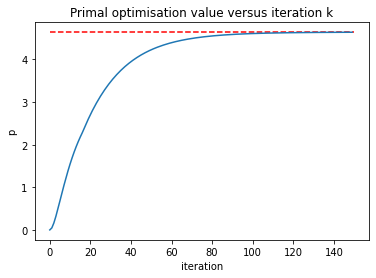

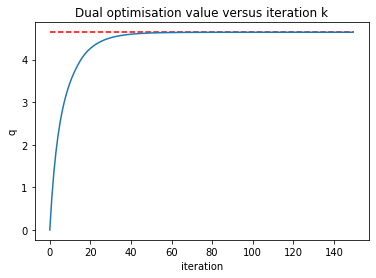

In [70]:
plt.figure()
plt.plot(np.arange(0, iterMax, 1), p)
plt.hlines(p[-1], 0, iterMax, colors='r', linestyles='--')
plt.xlabel('iteration')
plt.ylabel('p')
plt.title('Primal optimisation value versus iteration k')
plt.show()

plt.figure()
plt.plot(np.arange(0, iterMax, 1), q)
plt.hlines(q[-1], 0, iterMax, colors='r', linestyles='--')
plt.xlabel('iteration')
plt.ylabel('q')
plt.title('Dual optimisation value versus iteration k')
plt.show()